In [5]:
import pandas as pd
import matplotlib.pyplot as plt
sample_df = pd.read_csv("rectified_sample_df.csv")
display(sample_df.head())
print(sample_df.columns)

,hash,date,original_message,file_name,prev_source_code,cur_source_code,diff,llm_commit_inference,rectified_message,og_score,llm_score,rectified_score
0,76e0f9019e52f8675b7f7608ab7f59b36f9075e7,2018-04-18 00:13:11-07:00,Tiny bug fix to Laptop,drawings.py,b'from __future__ import absolute_import\n\nfr...,b'from __future__ import absolute_import\n\nfr...,<ide> class Laptop(VGroup):\n<ide> bod...,update laptop.py,update laptop.py to remove unnecessary screen_...,0.247139,0.205697,0.408672
1,3ce4c133dd494b6a34fc9a2f8e80879460e4f3da,2021-10-20 10:36:24+02:00,Introduced API for scene sections via :meth:`....,get_lines_to_point.npz,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\...,<ide>Binary files a/tests/control_data/graphic...,fix typo in test,"""Fixed typo in test data file get_lines_to_poi...",-0.012602,0.229964,0.671390
2,b1bfc9bbd5acf9958b0846936142c5af67c72a86,2021-01-25 11:39:17+01:00,Bugfix: fix code formatting in utils/debug.py ...,debug.py,"b'""""""Debugging utilities.""""""\n\n__all__ = [""pr...","b'""""""Debugging utilities.""""""\n\n\n__all__ = [""...","<ide> """"""Debugging utilities.""""""\n<ide> \n<del...",update index_labels.py,"""Bugfix: update index_labels function in utils...",0.577760,0.405691,0.402317
3,a982b3c1acdf200e90057d94d798704a515a4c41,2018-05-11 11:23:08-07:00,Some bug fixes to ZoomedScene,zoomed_scene.py,b'from __future__ import absolute_import\n\nfr...,b'from __future__ import absolute_import\n\nfr...,<ide> from __future__ import absolute_import\n...,update zoomedscene.py,"""Refactor ZoomedScene to extend MovingCameraSc...",0.459563,0.351731,0.490300
4,8691284496baee95605384ae7889da69cbd3ff12,2021-05-31 12:17:15+02:00,Update examples to use :class:`Axes` and depre...,moving_camera_scene.py,"b'""""""A scene whose camera can be moved around....","b'""""""A scene whose camera can be moved around....",<ide> Examples\n<ide> \n<ide> .. manim:: Movin...,update moving_camera.py,"""Update MovingCameraOnGraph to use Axes and re...",0.596666,0.387477,0.381975


Index(['hash', 'date', 'original_message', 'file_name', 'prev_source_code',
       'cur_source_code', 'diff', 'llm_commit_inference', 'rectified_message',
       'og_score', 'llm_score', 'rectified_score'],
      dtype='object')


In [6]:
# Sorting the sample_df by date
sample_df = sample_df.sort_values(by='date')

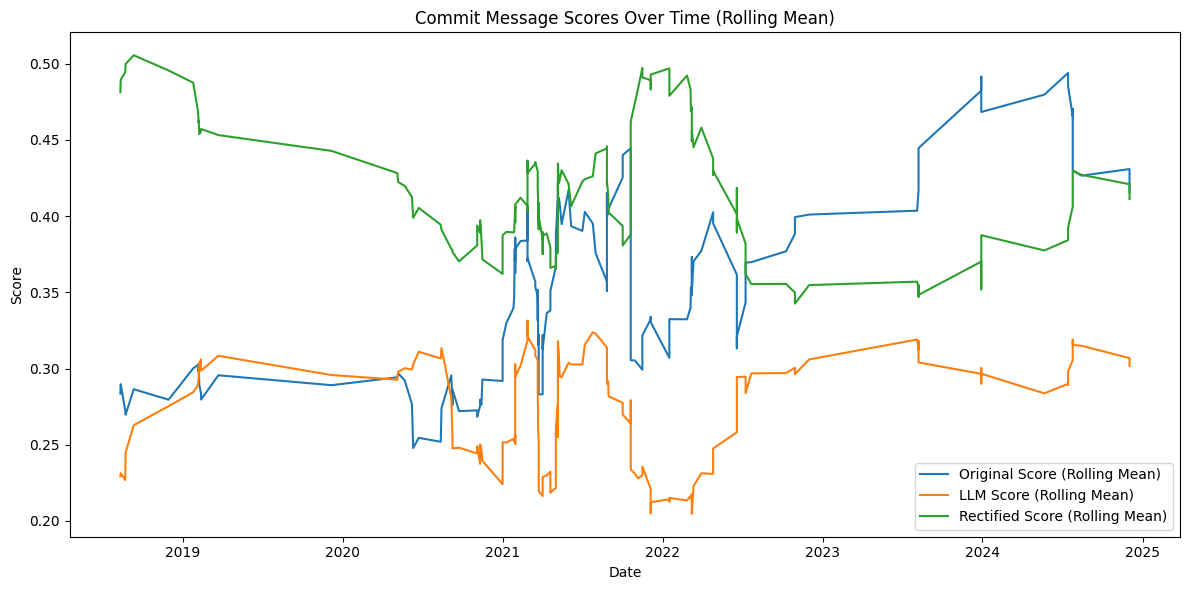

In [8]:
# Ensure 'date' is datetime and set as index if not already
if sample_df.index.name != 'date':
    sample_df['date'] = pd.to_datetime(sample_df['date'])
    sample_df = sample_df.sort_values('date').set_index('date')

# Calculate rolling mean (window=10, adjust as needed)
window = 20
rolling_og = sample_df['og_score'].rolling(window).mean()
rolling_llm = sample_df['llm_score'].rolling(window).mean()
rolling_rect = sample_df['rectified_score'].rolling(window).mean()

plt.figure(figsize=(12, 6))
plt.plot(rolling_og, label='Original Score (Rolling Mean)')
plt.plot(rolling_llm, label='LLM Score (Rolling Mean)')
plt.plot(rolling_rect, label='Rectified Score (Rolling Mean)')
plt.xlabel('Date')
plt.ylabel('Score')
plt.title('Commit Message Scores Over Time (Rolling Mean)')
plt.legend()
plt.tight_layout()
plt.show()


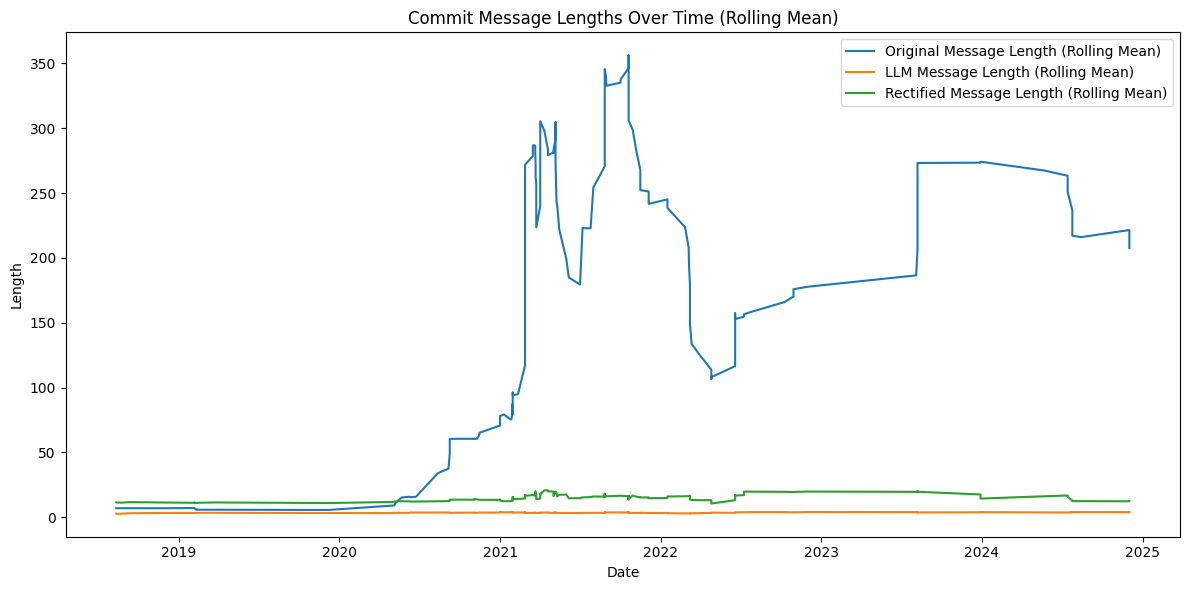

In [13]:
# Ensure 'date' is datetime and set as index if not already
if sample_df.index.name != 'date':
    sample_df['date'] = pd.to_datetime(sample_df['date'])
    sample_df = sample_df.sort_values('date').set_index('date')

# Calculate rolling mean (window=10, adjust as needed)
window = 20
rolling_og = pd.Series(sample_df['original_message'].apply(lambda x: len(x.split()))).rolling(window).mean()
rolling_llm = pd.Series(sample_df['llm_commit_inference'].apply(lambda x: len(x.split()))).rolling(window).mean()
rolling_rect = pd.Series(sample_df['rectified_message'].apply(lambda x: len(x.split()))).rolling(window).mean()

plt.figure(figsize=(12, 6))
plt.plot(rolling_og, label='Original Message Length (Rolling Mean)')
plt.plot(rolling_llm, label='LLM Message Length (Rolling Mean)')
plt.plot(rolling_rect, label='Rectified Message Length (Rolling Mean)')
plt.xlabel('Date')
plt.ylabel('Length')
plt.title('Commit Message Lengths Over Time (Rolling Mean)')
plt.legend()
plt.tight_layout()
plt.show()
